## Assignment 10
#### By Osmond Oke

#### Task: In the first part of the assignment, you will implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.

### 10.1a
##### In the first part of the assignment, you will implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.

In [1]:
import keras

In [2]:
def tokenize(sentence):
    tokens = keras.preprocessing.text.text_to_word_sequence(sentence)
    return(tokens)

In [3]:
tokens = tokenize("My name is Osmond and you are watching disney Channel. dim dum dee dum.")
tokens

['my',
 'name',
 'is',
 'osmond',
 'and',
 'you',
 'are',
 'watching',
 'disney',
 'channel',
 'dim',
 'dum',
 'dee',
 'dum']

### 10.1b
#### Implement an ngram function that splits tokens into N-grams.

In [4]:
def ngram(tokens, n):
    ngrams = []
    for i in range(len(tokens)-n+1):
        ngram = ' '.join(word_list for word_list in tokens[i:i+n])
        ngrams.append(ngram)
    return(ngrams)

In [5]:
ngram = ngram(tokens,6)
ngram

['my name is osmond and you',
 'name is osmond and you are',
 'is osmond and you are watching',
 'osmond and you are watching disney',
 'and you are watching disney channel',
 'you are watching disney channel dim',
 'are watching disney channel dim dum',
 'watching disney channel dim dum dee',
 'disney channel dim dum dee dum']

## 10.1c
#### Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens

In [6]:
def one_hot_encode(tokens, num_words = len(set(tokens))):
    num_words += 1 # Add an extra column, as this method always produces an empty first column
    tokenizer = keras.preprocessing.text.Tokenizer(num_words = num_words)
    tokenizer.fit_on_texts(tokens)
    sequences = tokenizer.texts_to_sequences(tokens)
    results = tokenizer.texts_to_matrix(tokens, mode='binary')
    results = results[:, 1:] # Remove first column, as it is always zeros
    token_index = tokenizer.word_index
    return(results)

In [7]:
one_hot_encode(tokens,15)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
one_hot_encode(tokens)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 10.2
#### Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [9]:
import os
import numpy as np

imdb_dir = '/home/jovyan/dsc650/data/external/imdb/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [10]:
max_words = 10000
embedding_dim = 100
maxlen = 100
training_samples = 200
validation_samples = 10000

In [11]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

data = keras.preprocessing.sequence.pad_sequences(sequences,maxlen=maxlen)
labels = np.asarray(labels)

In [12]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

In [13]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
#model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
dense (Dense)                (None, 100, 32)           3232      
_________________________________________________________________
dense_1 (Dense)              (None, 100, 1)            33        
Total params: 1,003,265
Trainable params: 1,003,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 218ms/step - loss: 0.6936 - acc: 0.4869 - val_loss: 0.6921 - val_acc: 0.5159
Epoch 2/10
7/7 [==============================] - 1s 153ms/step - loss: 0.6854 - acc: 0.6076 - val_loss: 0.6916 - val_acc: 0.5181
Epoch 3/10
7/7 [==============================] - 1s 159ms/step - loss: 0.6799 - acc: 0.6325 - val_loss: 0.6913 - va

In [15]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [16]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [17]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7044 - acc: 0.5211


[0.7043600678443909, 0.5211229920387268]

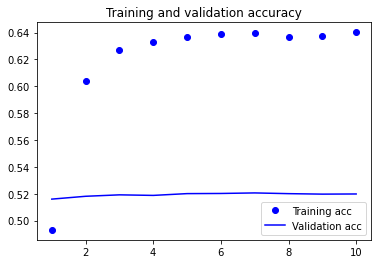

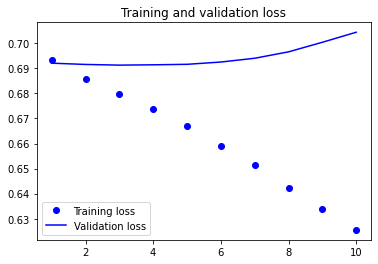

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 10.3
#### Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [19]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 2s 490ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6922 - val_acc: 0.5250
Epoch 2/10
2/2 [==============================] - 0s 153ms/step - loss: 0.6781 - acc: 0.8990 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 129ms/step - loss: 0.6611 - acc: 0.9333 - val_loss: 0.6902 - val_acc: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 129ms/step - loss: 0.6362 - acc: 0.9510 - val_loss: 0.6921 - val_acc: 0.4750
Epoch 5/10
2/2 [==============================] - 0s 136ms/step - loss: 0.5911 - acc: 0.9495 - val_loss: 0.6956 - val_acc: 0.4500
Epoch 6/10
2/2 [==============================] - 0s 135ms/step - loss: 0.5027 - acc: 0.9214 - val_loss: 0.6701 - val_acc: 0.6000
Epoch 7/10
2/2 [==============================] - 0s 130ms/step - loss: 0.4698 - acc: 0.9932 - val_loss: 0.6942 - val_acc: 0.5500
Epoch 8/10
2/2 [==============================] - 0s 134ms/step - loss: 0.3562 - acc: 0.99

In [20]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 13s 17ms/step - loss: 0.6618 - acc: 0.6656


[0.6618166565895081, 0.6656399965286255]

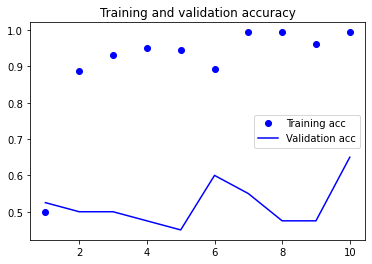

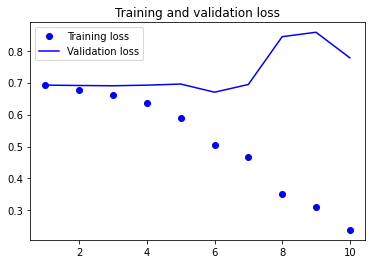

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 10.4
#### Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [22]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

max_features = 10000
max_len = 100

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 18, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 32)            7200      
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 385       
Total params: 1,316,289
Trainable params: 1,316,289
Non-trainable params: 0
____________________________________________

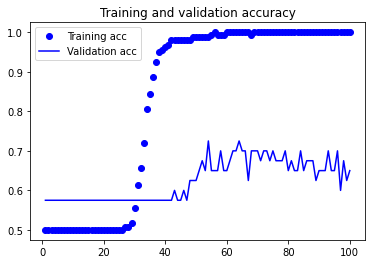

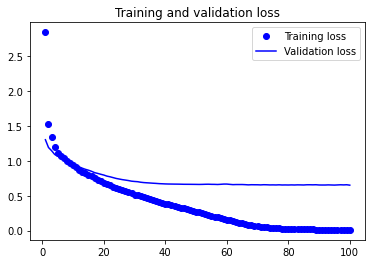

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()